## Step 1: State the Null and Alternative Hypothesis

#### Null Hypothesis:                                                                                                                                                                                                                                     Discount amount Does not have a statistically significant effect on the quantity of a product in an order
                                               Ho: u1 - u2 = 0

#### Alternate Hypothesis:  Discount amount has a statistically significant effect on the quantity of a product in order

                                                Ha: u1 - u2 != 0

## Step 2:  Choose a Significance Level(Alpha)

                                                Alpha = 0.05

## Step 3: Identify the Test Statistic & Probability Distribuition


      Our sample size is large (n>30) the appropriate test statistic to find our 'P_value" is Student T-Statistic:
                         
                         T_statistics = ((sample1_mean-sample_mean2)-0)/np.sqrt(((s_p/Sample1)+(s_p/Sample2)))
                         s_p = ((Sample1-1)*sample1_var + (Sample2-1)*sample_var2)/Degreesoffreedom
                         
                                  
                                               

## Step 4 : Specify the Decision Rule


In [1]:
from scipy import stats

In [2]:
#Calculate degrees of freedom
Sample1 = 77
Sample2 = 77
Degreesoffreedom = 77+77-2
Degreesoffreedom

152

In [3]:
stats.t.isf(0.05/2,Degreesoffreedom)

1.975693927806187

In [37]:
Standard_error = np.sqrt(((185)**2/77) + ((183)**2/77))
Standard_error

29.654723020163203

## Step 5: Collect  Data From Northwind Database

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
%matplotlib inline

In [5]:
#Set the connection with our database
#Explore and visualize the data

In [6]:
connection = sqlite3.connect('Northwind_small.sqlite') 
cur = connection.cursor()


In [7]:
cur.execute("""SELECT *
                FROM Product
                Order By Id ASC""")
Products_df = pd.DataFrame(cur.fetchall())
Products_df.columns = [x[0] for x in cur.description]
Products_df.head()


,Id,ProductName,SupplierId,CategoryId,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
0,1,Chai,1,1,10 boxes x 20 bags,18.00,39,0,10,0
1,2,Chang,1,1,24 - 12 oz bottles,19.00,17,40,25,0
2,3,Aniseed Syrup,1,2,12 - 550 ml bottles,10.00,13,70,25,0
3,4,Chef Anton's Cajun Seasoning,2,2,48 - 6 oz jars,22.00,53,0,0,0
4,5,Chef Anton's Gumbo Mix,2,2,36 boxes,21.35,0,0,0,1


In [8]:
Products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 10 columns):
Id                 77 non-null int64
ProductName        77 non-null object
SupplierId         77 non-null int64
CategoryId         77 non-null int64
QuantityPerUnit    77 non-null object
UnitPrice          77 non-null float64
UnitsInStock       77 non-null int64
UnitsOnOrder       77 non-null int64
ReorderLevel       77 non-null int64
Discontinued       77 non-null int64
dtypes: float64(1), int64(7), object(2)
memory usage: 6.1+ KB


In [9]:
cur.execute("""SELECT *
               FROM Orderdetail
               order by Id Asc
            """)
details_df = pd.DataFrame(cur.fetchall())
details_df.columns = [x[0] for x in cur.description]
details_df.head()


,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
0,10248/11,10248,11,14.0,12,0.0
1,10248/42,10248,42,9.8,10,0.0
2,10248/72,10248,72,34.8,5,0.0
3,10249/14,10249,14,18.6,9,0.0
4,10249/51,10249,51,42.4,40,0.0


### 5.1: Separate Data from both tables 


In [11]:
cur.execute("""SELECT Id,ProductName,UnitPrice
               FROM Product
               
               """)

Product_details = pd.DataFrame(cur.fetchall())
Product_details.columns = [x[0] for x in cur.description]
Product_details.head()

,Id,ProductName,UnitPrice
0,1,Chai,18.00
1,2,Chang,19.00
2,3,Aniseed Syrup,10.00
3,4,Chef Anton's Cajun Seasoning,22.00
4,5,Chef Anton's Gumbo Mix,21.35


In [12]:
cur.execute("""SELECT ProductId as Id, Quantity,discount
               FROM Orderdetail
               
               
               
            """)
Order_Product_details = pd.DataFrame(cur.fetchall())
Order_Product_details.columns = [x[0] for x in cur.description]
Order_Product_details.head()

,Id,Quantity,Discount
0,11,12,0.0
1,42,10,0.0
2,72,5,0.0
3,14,9,0.0
4,51,40,0.0


### 5.2:  Merge data from both tables

In [13]:
detailed_order = pd.merge(Product_details,Order_Product_details,on='Id')
detailed_order.head()

,Id,ProductName,UnitPrice,Quantity,Discount
0,1,Chai,18.0,45,0.20
1,1,Chai,18.0,18,0.00
2,1,Chai,18.0,20,0.00
3,1,Chai,18.0,15,0.15
4,1,Chai,18.0,12,0.00


### 5.3: Separate Data into two diffrent groups (Discount Offered) & (No Discount Offered)

#### order details when a discount was offered

In [15]:
Detailed_order_with_disc = detailed_order.loc[detailed_order['Discount']> 0]
Detailed_order_with_disc.head()

,Id,ProductName,UnitPrice,Quantity,Discount
0,1,Chai,18.0,45,0.20
3,1,Chai,18.0,15,0.15
5,1,Chai,18.0,15,0.15
9,1,Chai,18.0,40,0.20
10,1,Chai,18.0,8,0.15


#### order details when "No" discount was offered

In [17]:
Detailed_order_no_disc = detailed_order.loc[detailed_order['Discount']== 0.00]
Detailed_order_no_disc.head()

,Id,ProductName,UnitPrice,Quantity,Discount
1,1,Chai,18.0,18,0.0
2,1,Chai,18.0,20,0.0
4,1,Chai,18.0,12,0.0
6,1,Chai,18.0,10,0.0
7,1,Chai,18.0,24,0.0


### Calculate the mean and variance of Sample_1 when no discount was offerer

In [18]:
#Sum the total quantity sold per item

group1 = Detailed_order_no_disc.groupby('ProductName')['Quantity'].sum()
group1.head()

ProductName
Alice Mutton         460
Aniseed Syrup        288
Boston Crab Meat     572
Camembert Pierrot    765
Carnarvon Tigers     262
Name: Quantity, dtype: int64

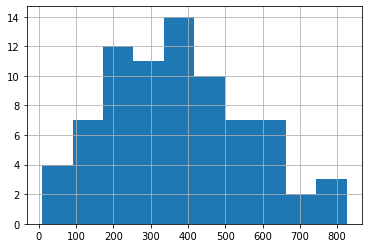

In [40]:
group1.hist()

In [38]:
#calculate the mean of samples when no discount was offered

mean1 = group1.mean()
mean1

371.4155844155844

In [39]:
# Rename the 'mean1 to 'Sample1 mean for quantity of an order when no discount was offered

sample1_mean = mean1
sample1_mean

371.4155844155844

In [22]:
#Calculate the variance

sample1_var = group1.var()
sample1_var

34652.45659603553

In [23]:
group1.std()

186.15170317790685

### Calculate mean and variance for Sample_2 when discount was offered

In [25]:
#Sum of the total quantity sold per item

group2 = Detailed_order_with_disc.groupby('ProductName')['Quantity'].sum()
group2.head()

ProductName
Alice Mutton         518
Aniseed Syrup         40
Boston Crab Meat     531
Camembert Pierrot    812
Carnarvon Tigers     277
Name: Quantity, dtype: int64

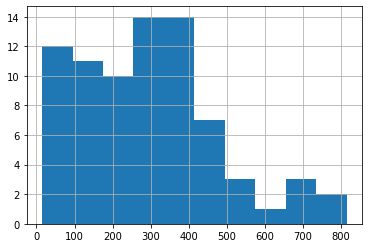

In [26]:
group2.hist()

In [27]:
#Calculate the Sample mean for quantity of orders when  discount was offered
sample_mean2 =group2.mean()
sample_mean2

295.038961038961

In [28]:
sample_var2 = group2.var()
sample_var2

33838.95898838003

In [29]:
group2.std()

183.9536870747092

#### Calculate pooled variance 

In [30]:
s_p = ((Sample1-1)*sample1_var + (Sample2-1)*sample_var2)/Degreesoffreedom
s_p

34245.70779220778

#### Calculate T statistic (p_value)

In [31]:
T_statistics = ((sample1_mean-sample_mean2)-0)/np.sqrt(((s_p/Sample1)+(s_p/Sample2)))
T_statistics

2.560871256861633

In [32]:
stats.ttest_ind(group1,group2,equal_var=True)

Ttest_indResult(statistic=2.5608712568616325, pvalue=0.011415132764366688)

In [33]:
from statsmodels.stats.power import TTestIndPower

In [34]:
power_analysis = TTestIndPower()

In [35]:
power_analysis.solve_power(effect_size=0.5, nobs1=77, alpha=0.05)

0.86923775878973

## Step 6:  Make Statistical Decision

### Our P-value is (0.011) and is less than our Alpha(0.05) ,Setting a confidence Level of 95% and assuming Equal Variance.

###  Our Hypothesis Test Proposed that we have a 'False Positive'. Discount amount Does not have a statistically significant effect on the quantity of an item in terms of more sales.
 



   ## We Fail to reject our Null Hypothesis.
                                                     Ho: u1 - u2 = 0

## Step 7: Suggest Two more Alternate Hypothesis

###  Alternate Hypothesis 1:

#### Mean Quantity of items sold when a 'Discount' was offered is higher than the Mean Quantity of items sold when 'No Discount' was offered
                                
                                Ho: u1 !< u2
                                
                                Ha: u1 < u2
                                
                                P-Value = 0.9943 
                                
                                
### We Fail to reject our null hypothesis is this scenario

### Alternate Hypothesis 2:

#### Mean Quantity of items sold when a ' No Discount' was offered is higher than the Mean Quantity of items sold when 'Discount' was offered

                                 Ho: u1 !> u2
                                 
                                 Ha: u1 > u2:
                                 
                                 P-value = 0.0059
                                 
###  We reject our null hypothesis and accept our alternate hypothesis